<a href="https://colab.research.google.com/github/edlawit12/Data110--Fall2025/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_excel("Airbnb_DC_25.csv")
df.head()
print("First 5 rows:")
print(df.head())


First 5 rows:
     id                                name  host_id host_name  \
0  3686                     Vita's Hideaway     4645      Vita   
1  3943    Historic Rowhouse Near Monuments     5059      Vasa   
2  4197  Capitol Hill Bedroom walk to Metro     5061    Sandra   
3  4529           Bertina's  House Part One     5803   Bertina   
4  5589            Cozy apt in Adams Morgan     6527       Ami   

   neighbourhood_group                                      neighbourhood  \
0                  NaN                                 Historic Anacostia   
1                  NaN  Edgewood, Bloomingdale, Truxton Circle, Eckington   
2                  NaN                         Capitol Hill, Lincoln Park   
3                  NaN                       Eastland Gardens, Kenilworth   
4                  NaN     Kalorama Heights, Adams Morgan, Lanier Heights   

   latitude  longitude        room_type  price  minimum_nights  \
0  38.86339  -76.98889     Private room   60.0              

In [6]:

print(f"Missing prices: {df['price'].isnull().sum()}")

df_clean = df.dropna(subset=['price'])

print(f"Data type of price column: {df_clean['price'].dtype}")



Missing prices: 1488
Data type of price column: float64


In [12]:
neighborhood_prices = df_clean.groupby('neighbourhood')['price'].mean()
neighborhood_prices_sorted = neighborhood_prices.sort_values(ascending=False).reset_index()

print("Average Prices by Neighborhood (Highest to Lowest):")
print(neighborhood_prices_sorted.head(10))

Average Prices by Neighborhood (Highest to Lowest):
                                       neighbourhood       price
0  Downtown, Chinatown, Penn Quarters, Mount Vern...  277.257261
1                        West End, Foggy Bottom, GWU  264.400000
2     Howard University, Le Droit Park, Cardozo/Shaw  250.661972
3                    Georgetown, Burleith/Hillandale  241.529851
4     Cathedral Heights, McLean Gardens, Glover Park  240.685185
5  Colonial Village, Shepherd Park, North Portal ...  236.166667
6  Southwest Employment Area, Southwest/Waterfron...  229.333333
7              Hawthorne, Barnaby Woods, Chevy Chase  223.090909
8     Kalorama Heights, Adams Morgan, Lanier Heights  203.923529
9                          Near Southeast, Navy Yard  189.865169


<Figure size 1200x600 with 0 Axes>

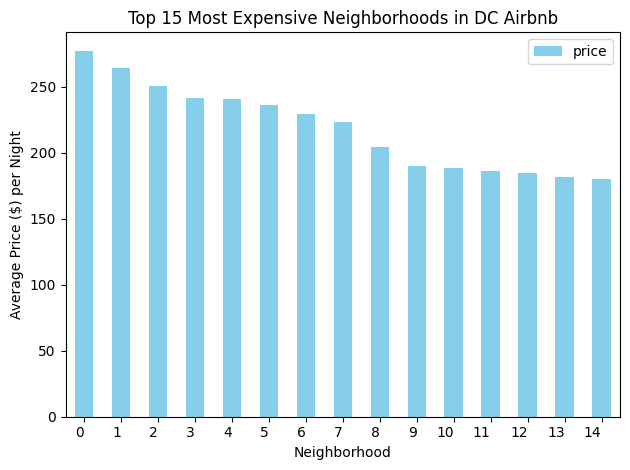

In [17]:
import matplotlib.pyplot as plt

top_15 = neighborhood_prices_sorted.head(15)

plt.figure(figsize=(12, 6))
top_15.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Expensive Neighborhoods in DC Airbnb')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($) per Night')
plt.xticks(rotation=360, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

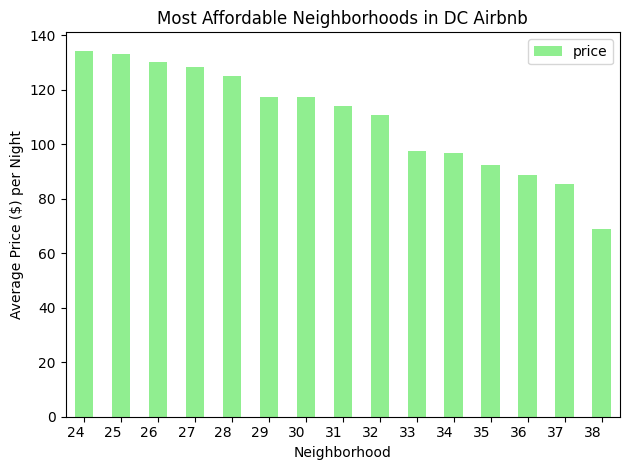

In [19]:

bottom_15 = neighborhood_prices_sorted.tail(15)

plt.figure(figsize=(12, 6))
bottom_15.plot(kind='bar', color='lightgreen')
plt.title('Most Affordable Neighborhoods in DC Airbnb')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($) per Night')
plt.xticks(rotation=360, ha='right')
plt.tight_layout()
plt.show()

In [20]:

roomtype_prices = df_clean.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("Average Prices by Room Type:")
print(roomtype_prices)
print("\n" + "="*50 + "\n")


roomtype_counts = df_clean['room_type'].value_counts()
print("Number of Listings by Room Type:")
print(roomtype_counts)
print("\n" + "="*50 + "\n")


print("Price Statistics by Room Type:")
roomtype_stats = df_clean.groupby('room_type')['price'].describe()
print(roomtype_stats)

Average Prices by Room Type:
room_type
Shared room        1455.466667
Hotel room          345.968254
Entire home/apt     181.109547
Private room        103.272807
Name: price, dtype: float64


Number of Listings by Room Type:
room_type
Entire home/apt    3551
Private room       1140
Hotel room           63
Shared room          15
Name: count, dtype: int64


Price Statistics by Room Type:
                  count         mean          std   min    25%    50%     75%  \
room_type                                                                       
Entire home/apt  3551.0   181.109547   139.248029  10.0  106.0  146.0  205.00   
Hotel room         63.0   345.968254   221.303395  28.0  220.0  292.0  419.50   
Private room     1140.0   103.272807   124.710651  24.0   50.0   68.0  109.25   
Shared room        15.0  1455.466667  2869.751877  23.0   56.5   72.0  136.50   

                    max  
room_type                
Entire home/apt  2800.0  
Hotel room       1039.0  
Private room     1

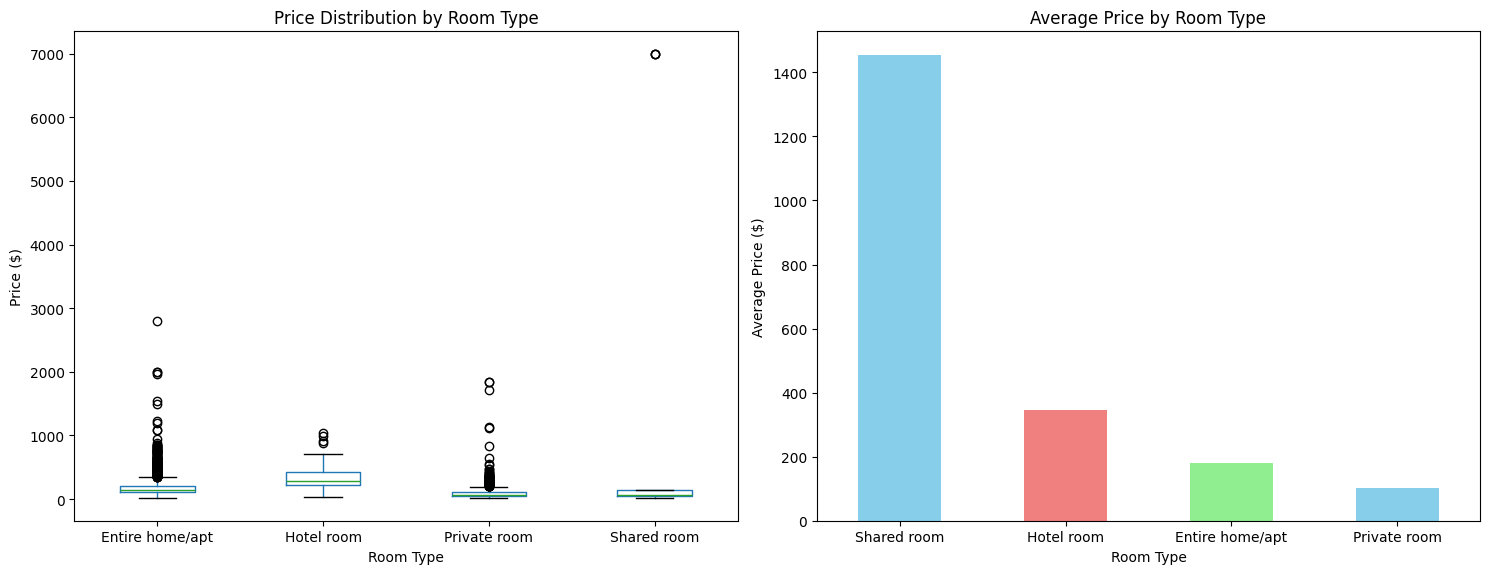

In [23]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


df_clean.boxplot(column='price', by='room_type', ax=ax1, grid=False)
ax1.set_title('Price Distribution by Room Type')
ax1.set_ylabel('Price ($)')
ax1.set_xlabel('Room Type')


roomtype_prices.plot(kind='bar', ax=ax2, color=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Average Price by Room Type')
ax2.set_ylabel('Average Price ($)')
ax2.set_xlabel('Room Type')
ax2.tick_params(axis='x', rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()